In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(rc={"figure.figsize": (16, 9)})
sns.set(style="whitegrid")

In [19]:
week1 = pd.read_json("http://api.fantasy.nfl.com/v1/players/stats?statType=seasonStats&season=2015&statType=weekStats&week=1&format=json")
week2 = pd.read_json("http://api.fantasy.nfl.com/v1/players/stats?statType=seasonStats&season=2015&statType=weekStats&week=2&format=json")

In [53]:
# transform and remove unwanted data
# WARNING: destructive to original data structure!
def remove_stat_columns(df):
    temp = pd.io.json.json_normalize(df['players'])
    stat_cols = [col for col in temp.columns if 'stats' in col]
    for col in stat_cols:
        temp.drop(col, 1, inplace=True)
    return temp

week1_players = remove_stat_columns(week1)
week2_players = remove_stat_columns(week2)
week1_players['week'] = 'one'
week2_players['week'] = 'two'

week1_players.head()

,esbid,gsisPlayerId,id,name,position,seasonProjectedPts,seasonPts,teamAbbr,weekProjectedPts,weekPts,week
0,False,False,100029,San Francisco 49ers,DEF,123.0,64.0,SF,0,14.0,one
1,ABD647726,00-0032104,2552374,Ameer Abdullah,RB,178.5,92.0,DET,0,15.4,one
2,ABD660476,00-0025940,729,Husain Abdullah,DB,0.0,27.5,,0,6.5,one
3,ACK184395,00-0031186,2549981,Kenneth Acker,DB,0.0,74.0,KC,0,3.5,one
4,ADA218591,00-0031381,2543495,Davante Adams,WR,113.2,56.3,GB,0,5.9,one


In [ ]:
## TODO - use the above and craft a loop to download all weeks and merge each week into a dataframe

In [54]:
all_weeks = pd.concat([week1_players, week2_players])
all_weeks.head()

,esbid,gsisPlayerId,id,name,position,seasonProjectedPts,seasonPts,teamAbbr,weekProjectedPts,weekPts,week
0,False,False,100029,San Francisco 49ers,DEF,123.0,64.0,SF,0,14.0,one
1,ABD647726,00-0032104,2552374,Ameer Abdullah,RB,178.5,92.0,DET,0,15.4,one
2,ABD660476,00-0025940,729,Husain Abdullah,DB,0.0,27.5,,0,6.5,one
3,ACK184395,00-0031186,2549981,Kenneth Acker,DB,0.0,74.0,KC,0,3.5,one
4,ADA218591,00-0031381,2543495,Davante Adams,WR,113.2,56.3,GB,0,5.9,one


In [55]:
# does it work better wide?
all_weeks['actual_vs_proj'] = all_weeks['weekPts'] - all_weeks['weekProjectedPts']
all_weeks.head()

,esbid,gsisPlayerId,id,name,position,seasonProjectedPts,seasonPts,teamAbbr,weekProjectedPts,weekPts,week,actual_vs_proj
0,False,False,100029,San Francisco 49ers,DEF,123.0,64.0,SF,0,14.0,one,14.0
1,ABD647726,00-0032104,2552374,Ameer Abdullah,RB,178.5,92.0,DET,0,15.4,one,15.4
2,ABD660476,00-0025940,729,Husain Abdullah,DB,0.0,27.5,,0,6.5,one,6.5
3,ACK184395,00-0031186,2549981,Kenneth Acker,DB,0.0,74.0,KC,0,3.5,one,3.5
4,ADA218591,00-0031381,2543495,Davante Adams,WR,113.2,56.3,GB,0,5.9,one,5.9


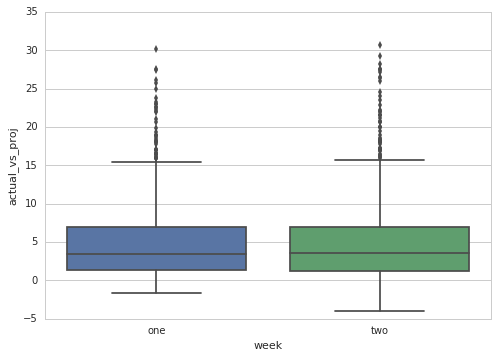

In [56]:
sns.boxplot(x='week', y='actual_vs_proj', data=all_weeks)
plt.show()

Look at player performance over time

In [46]:
horiz = week1_players.merge(week2_players[['id', 'weekPts']], left_on='id', right_on='id', how='left')
horiz.fillna(0)

,esbid,gsisPlayerId,id,name,position,seasonProjectedPts,seasonPts,teamAbbr,weekProjectedPts,weekPts_x,week,weekPts_y
0,False,False,100029,San Francisco 49ers,DEF,123.00,64.00,SF,0,14.00,one,-4.00
1,ABD647726,00-0032104,2552374,Ameer Abdullah,RB,178.50,92.00,DET,0,15.40,one,1.80
2,ABD660476,00-0025940,729,Husain Abdullah,DB,0.00,27.50,,0,6.50,one,0.00
3,ACK184395,00-0031186,2549981,Kenneth Acker,DB,0.00,74.00,KC,0,3.50,one,5.50
4,ADA218591,00-0031381,2543495,Davante Adams,WR,113.20,56.30,GB,0,5.90,one,3.30
5,ADA515576,00-0022247,2505708,Mike Adams,DB,0.00,95.50,IND,0,3.50,one,6.50
6,ADA534252,00-0027610,1037889,Phillip Adams,DB,0.00,43.00,,0,3.00,one,6.50
7,ADD129366,00-0030312,2541958,Jahleel Addae,DB,0.00,68.00,SD,0,4.00,one,0.00
8,ADD494264,00-0028339,2530474,Mario Addison,DL,0.00,31.00,CAR,0,7.00,one,1.50
9,AGH474619,00-0031549,2552600,Nelson Agholor,WR,119.40,32.30,PHI,0,0.50,one,3.10


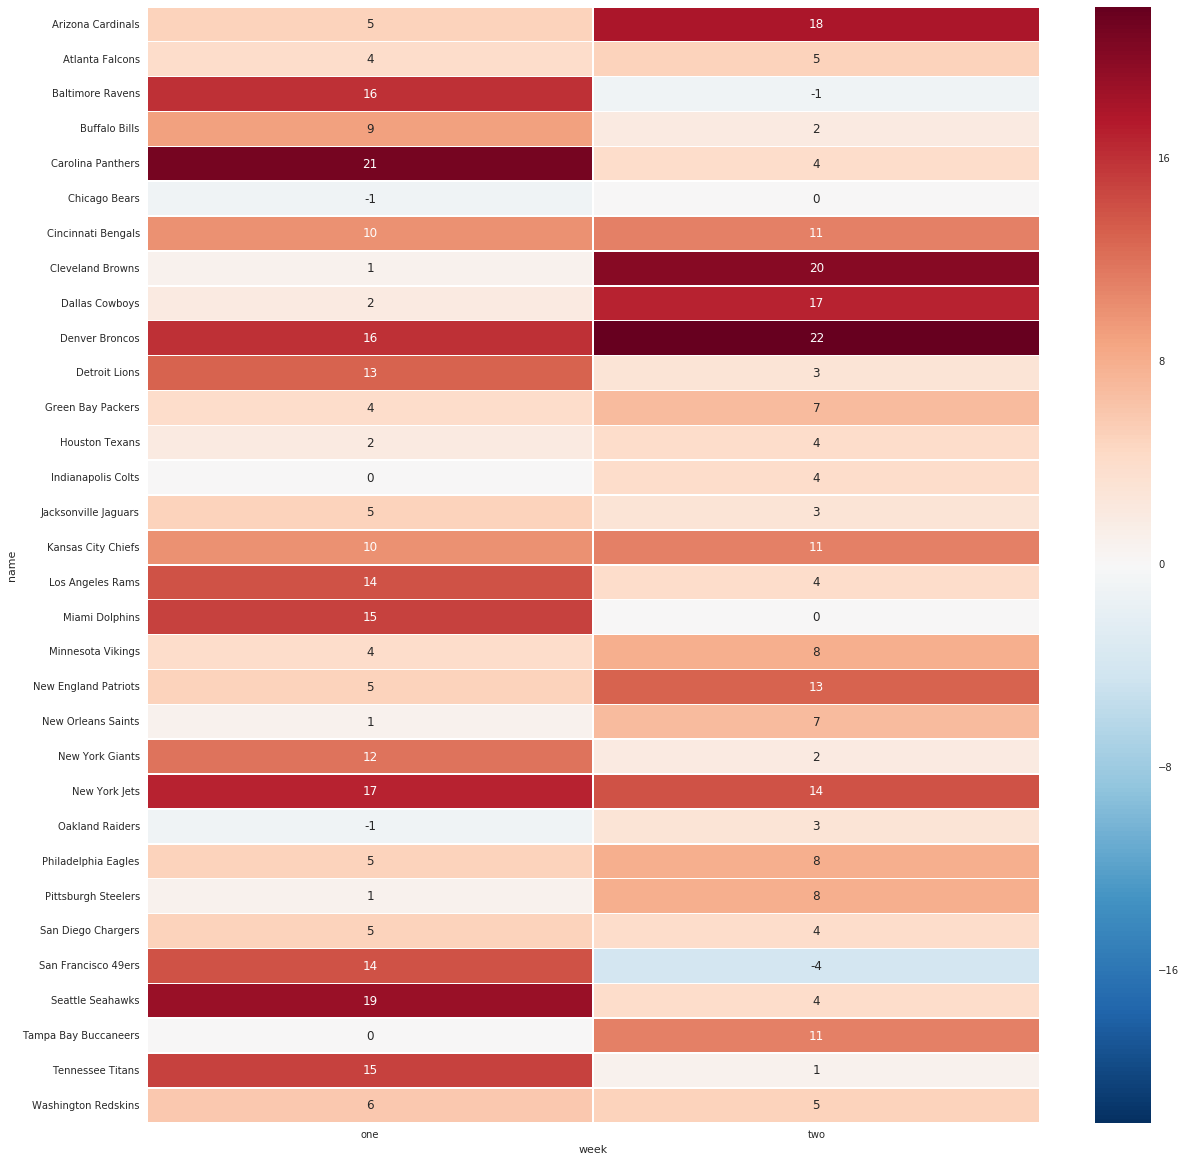

In [104]:
sns.set(rc={"figure.figsize": (20, 20)})

# NOTE: name would be a lot more useful here, but there are duplicates and that raises an error
tab = all_weeks[all_weeks['position'] == 'DEF'].dropna().pivot("name", "week", "weekPts")
sns.heatmap(tab, annot=True, linewidths=.5)
plt.show()

In [105]:
tab.transpose().std().dropna().sort_values()

name
Kansas City Chiefs       0.707107
San Diego Chargers       0.707107
Cincinnati Bengals       0.707107
Chicago Bears            0.707107
Washington Redskins      0.707107
Atlanta Falcons          0.707107
Houston Texans           1.414214
Jacksonville Jaguars     1.414214
Philadelphia Eagles      2.121320
Green Bay Packers        2.121320
New York Jets            2.121320
Minnesota Vikings        2.828427
Oakland Raiders          2.828427
Indianapolis Colts       2.828427
Denver Broncos           4.242641
New Orleans Saints       4.242641
Pittsburgh Steelers      4.949747
Buffalo Bills            4.949747
New England Patriots     5.656854
Los Angeles Rams         7.071068
New York Giants          7.071068
Detroit Lions            7.071068
Tampa Bay Buccaneers     7.778175
Arizona Cardinals        9.192388
Tennessee Titans         9.899495
Dallas Cowboys          10.606602
Seattle Seahawks        10.606602
Miami Dolphins          10.606602
Carolina Panthers       12.020815
Baltimore